## Business Interpretation

- Contract type and tenure are the strongest drivers of churn.
- Month-to-month customers with short tenure show high churn risk.
- Higher monthly charges increase churn probability when not bundled with support services.
- SHAP explanations enable targeted retention strategies.


In [5]:
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt
import warnings
from tqdm import TqdmWarning

warnings.filterwarnings("ignore", category=TqdmWarning)

In [6]:
df = pd.read_csv("../data/processed/cleaned_telco.csv")

X = df.drop("Churn", axis=1)
y = df["Churn"]


In [7]:
pipeline = joblib.load("../models/churn_pipeline.pkl")

preprocessor = pipeline.named_steps["preprocessor"]
model = pipeline.named_steps["classifier"]


In [8]:
X_transformed = preprocessor.transform(X)


In [9]:
# Numerical features
num_features = preprocessor.transformers_[0][2]

# Categorical features (after one-hot encoding)
cat_encoder = preprocessor.transformers_[1][1]
cat_features = cat_encoder.get_feature_names_out(
    preprocessor.transformers_[1][2]
)

feature_names = np.concatenate([num_features, cat_features])


In [11]:
explainer = shap.LinearExplainer(
    model,
    X_transformed,
    feature_names=feature_names
)

shap_values = explainer.shap_values(X_transformed)



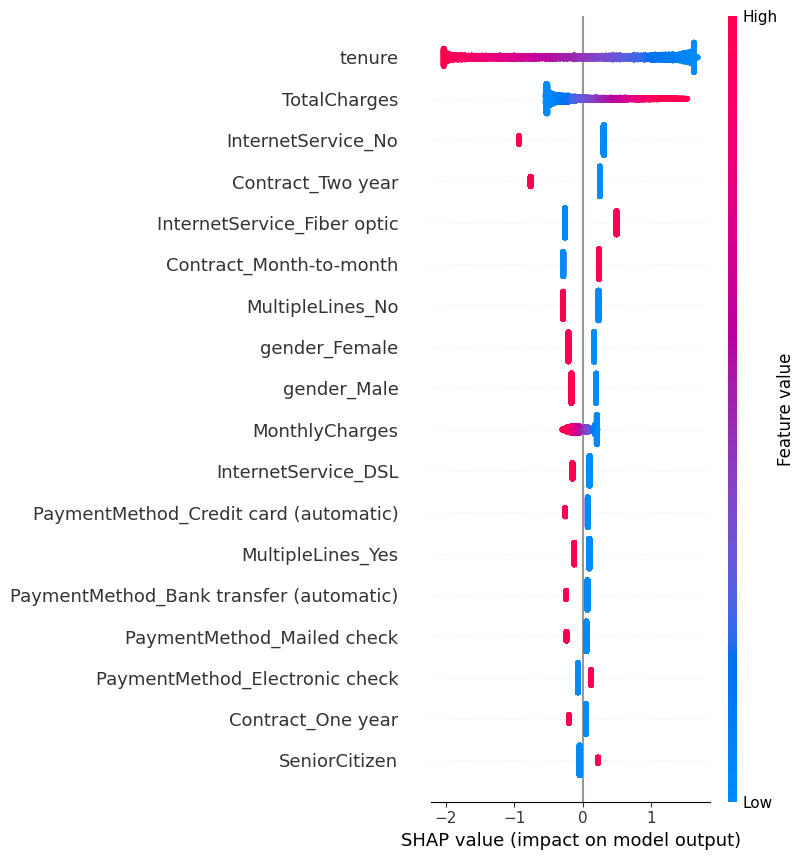

In [14]:
shap.summary_plot(
    shap_values,
    X_transformed,
    feature_names=feature_names
)




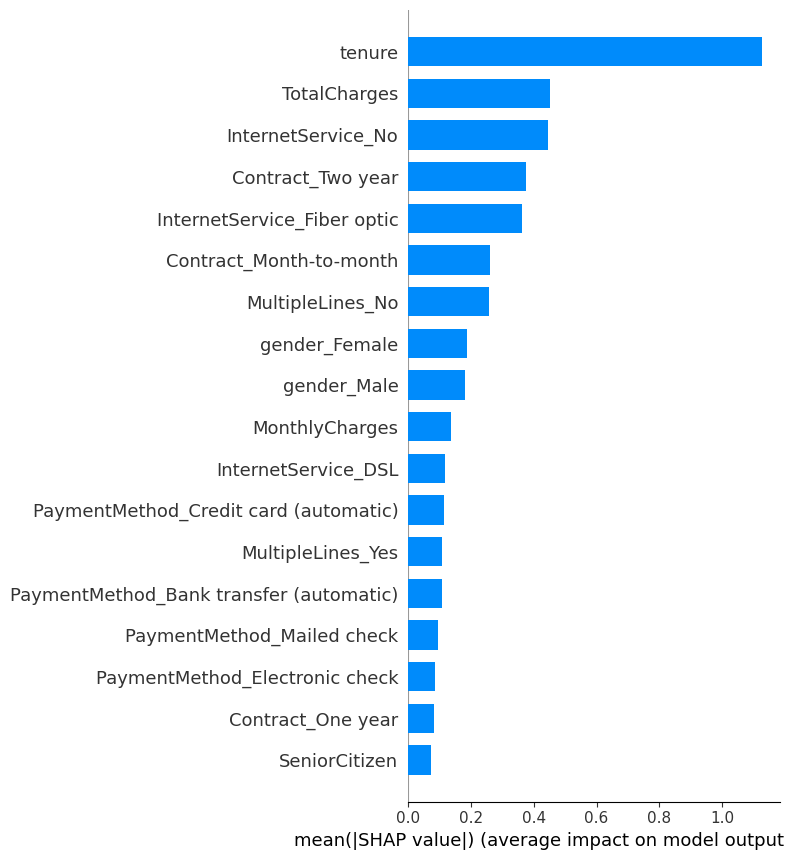

In [18]:
shap.summary_plot(
    shap_values,
    X_transformed,
    feature_names=feature_names,
    plot_type="bar"
)



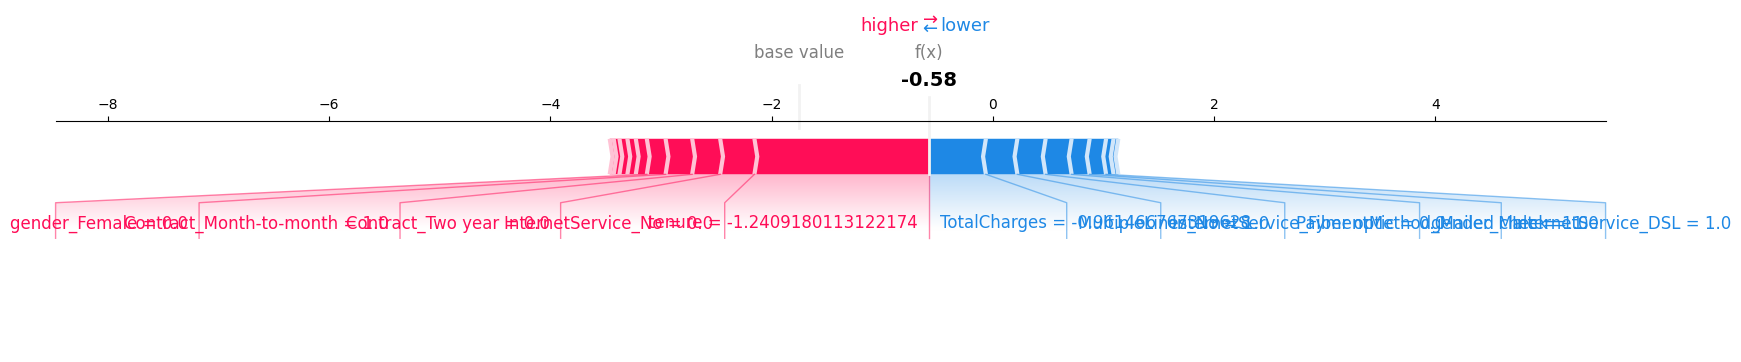

In [19]:
# Pick any sample (e.g., first churned customer)
idx = y[y == 1].index[0]

shap.force_plot(
    explainer.expected_value,
    shap_values[idx],
    X_transformed[idx],
    feature_names=feature_names,
    matplotlib=True
)


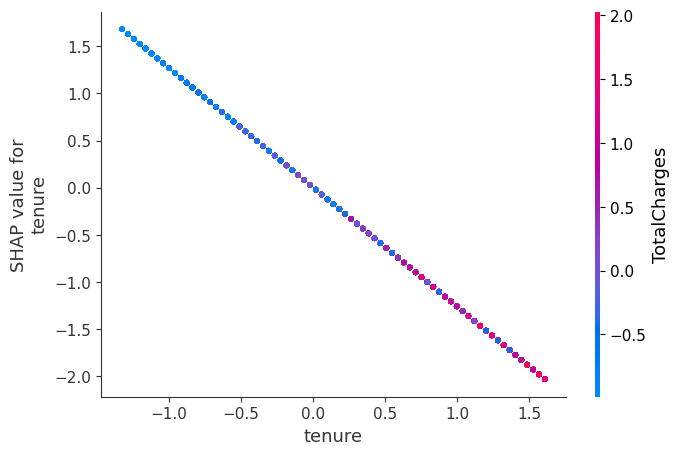

In [20]:
shap.dependence_plot(
    "tenure",
    shap_values,
    X_transformed,
    feature_names=feature_names
)
